# This should walk you through how to use our software

### It is only a brief explanation of how to use the various functions, though should be relatively helpful.

In [1]:
#First import all the relevant functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys,time

#Then import my prewritten classes
from RunningTheCode import RunTheProgram
from PhantomAndMap import Phantom, PatientData

Now you need to export a .xlsx file from OpenREM:
Go to OpenREM -> Fluoroscopy -> (set your preferences and press 'Submit') -> XLSX export

Save this wherever you want and keep note of the destination.

In [2]:
Testfile = 'TestDataset.xlsx' #The destination
#(This is a fake dataset produced to demonstrate the code)

We have a simple Phantom model which rather uninspiringly is called Phantom

Essentially it returns Phantom parameters based on Patient size

The CR and FW are related to the phantom outlined in the READ.ME

In [3]:
Height = 170 #cm
Weight = 70 #kg
P = Phantom(Height, Weight)

In [4]:
#This gives multiple values which describe the phantoms body. 
CR = P.CurvatureRadius
FW = P.Flattenedwidth
print(f'Curve radius = {CR}, Flat Width = {FW}')

Curve radius = 12.00490095997562, Flat Width = 15.006126199969524


In [5]:
P2 = Phantom(180, 90, 45, 10)
#Now, as well as CR and FW,  we can extract
PrDisp = P2.PrimaryDisplacement
ScDisp = P2.SecondaryDisplacement
ICB = P2.CentreToBeamEntry
print(f'Primary Displacement = {PrDisp} \nSecondary Displacement = {ScDisp} \nIsocentre to point on skin where beam hits the patient: {ICB} \n(all units are in cm)')

Primary Displacement = 12.602177215728927 
Secondary Displacement = 3.1232960444313673 
Isocentre to point on skin where beam hits the patient: 17.98636010864247 
(all units are in cm)


Note: to save time in loops we can simply define the patient parameters:

In [6]:
P2 = Phantom(None, None, 45, 10, CurvatureRadius = 12, Flattenedwidth = 15)
#Now, as well as CR and FW,  we can extract
PrDisp = P2.PrimaryDisplacement
ScDisp = P2.SecondaryDisplacement
ICB = P2.CentreToBeamEntry
print(f'Primary Displacement = {PrDisp} \nSecondary Displacement = {ScDisp} \nIsocentre to point on skin where beam hits the patient: {ICB} \n(all units are in cm)')

Primary Displacement = 11.431620648268499 
Secondary Displacement = 2.8331878643647332 
Isocentre to point on skin where beam hits the patient: 16.31569228756137 
(all units are in cm)


## We can extract information from the test file using Runtheprogram and PatientData

Having now described a phantom which can map from the centre of the back to any point on the torso based on primary and secondary angle inputs, we can use our OpenREM export to properly interpret things

In [7]:
#First just use RunTheProgram
UseTestdata = RunTheProgram(Testfile)
print(UseTestdata)

This module returns a pandas dataset (use .Dataframe) 
You can then process this dataframe for an individual Accession or over the entire dataset 


In [8]:
#As explaned by the object string variable, Now we can get the data in the form of a dataframe
sourcedata = UseTestdata.Dataframe

In [9]:
#If we want we can filter the dataset according to one specific patients data:
AccessionNumber = ['REFNu10'] #This is a fake patient

df = sourcedata.loc[sourcedata['Accession number'].isin(AccessionNumber)]
#now we have 'df' a dataframe specific to the patient and can use it as follows...

## We can discover a lot about the patient using 'Patient Data' which extracts specific patient information and also performs the peak skin dose calculation.

In [10]:

Patient = PatientData(df)
print(Patient)

#Note here as an aside I'm going to also define a patient where the accuracy in the PSD calculation is turned up
AcPatient = PatientData(df, GreaterAccuracy = True)

Patient REFNu10 recieved a peak skin dose of 0.16 Gy
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd an

In [11]:
#For example:
print(f'The study was {Patient.Study}, \n'\
      f'performed on {Patient.Date} \n'\
      f'The Patient was {Patient.Age} years old,\n'\
      f'and of sex {Patient.Sex}')

#Note there are many more variables this can return, just check the source code

The study was Cardiac Angio coronaries, 
performed on 1902-09-26 00:00:00 
The Patient was 58.5 years old,
and of sex M


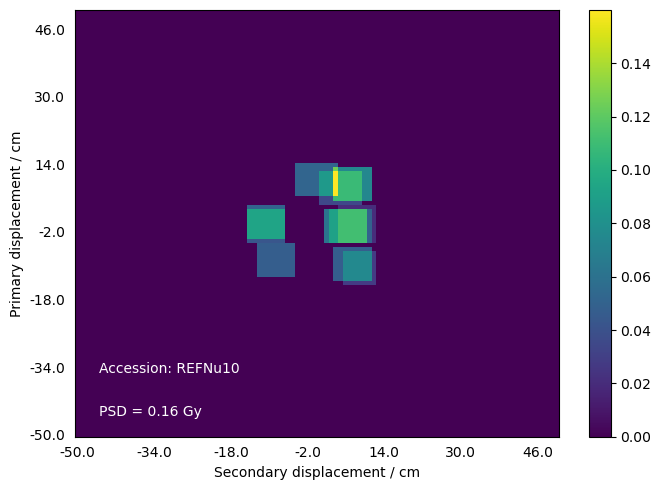

In [12]:
#We can plot the patients exam using:
Patient.PlotMap()

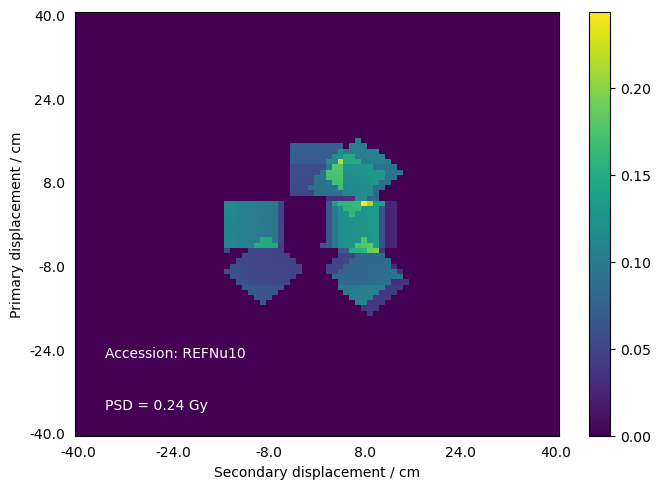

In [13]:
#we can do the same with our 'More Accurate Patient' Note how the shape of the field now changes with the curve of the phantom
AcPatient.PlotMap()

## Alternatively this can all be completed automatically using RuntheProgram

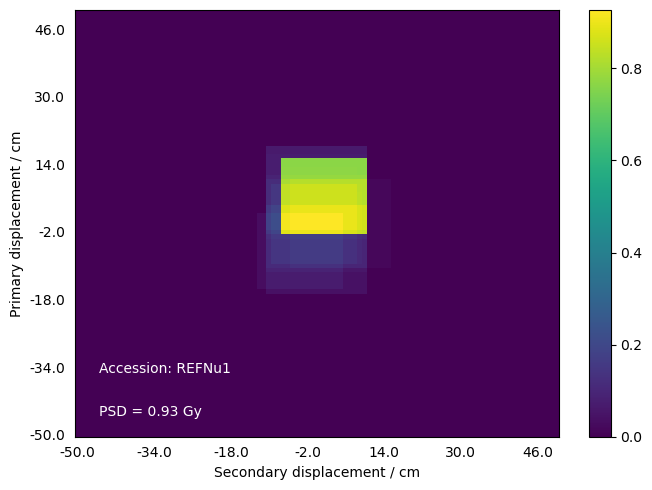

PSD = 0.927 Gy


In [14]:
# We already defined UseTestdata: Note this outputs a map and all the relevant data
AccessionNumber = ['REFNu1'] #This is another fake patient
Patientinfo = UseTestdata.IndividualsData(AccessionNumber)

In [15]:
#If we view the returned value, we can see that it takes the same form as a PatientData output
print(Patientinfo)

Patient REFNu1 recieved a peak skin dose of 0.93 Gy


In [16]:
#For example:
print(f'The study was {Patientinfo.Study}, \n'\
      f'performed on {Patientinfo.Date} \n'\
      f'The Patient was {Patientinfo.Age} years old,\n'\
      f'and of sex {Patientinfo.Sex}')

The study was Angio splenic, 
performed on 1902-09-26 00:00:00 
The Patient was 57.6 years old,
and of sex F


In [17]:
#There is an additional output however:
print(f'{Patientinfo.String}')

PSD = 0.927 Gy


## We can also process an entire dataset

In [18]:
'''If we want to process the entire dataset we can use'''
#Note: This may take some time
entiredataframe = UseTestdata.EntireDataset()

This may take a while. Cycle Starting...
Progress at 9.1%
Progressed to 100% Completed!
Total time = 0.28 min


In [19]:
print(entiredataframe)

         Date Accession number Operator          Study description   Age Sex  \
0  1902-09-26           REFNu1  not inc              Angio splenic  57.6   F   
1  1902-09-26          REFNu10  not inc   Cardiac Angio coronaries  58.5   M   
2  1902-09-26          REFNu11  not inc   Cardiac Angio coronaries  51.4   M   
3  1902-09-26           REFNu2  not inc                       ERCP  72.0   M   
4  1902-09-26           REFNu3  not inc    ERCP and sphincterotomy  60.6   M   
5  1902-09-26           REFNu4  not inc       Angio Lower Limbs Rt  67.7   F   
6  1902-09-26           REFNu5  not inc                       ERCP  83.8   F   
7  1902-09-26           REFNu6  not inc       Angio Lower Limbs Rt  66.1   M   
8  1902-09-26           REFNu7  not inc       Angio Lower Limbs Lt  92.6   F   
9  1902-09-26           REFNu8  not inc  Fistulogram upper Limb Rt  52.8   M   
10 1902-09-26           REFNu9  not inc   Cardiac Angio coronaries  57.0   F   

    Height  Weight   RPdose      DAP   

This can be saved using entiredataframe.to_csv(args)

# Next Lets look at more accurate Modelling

In [20]:
# if we perform this action using the moreaccurate plotting method it takes far longer...
print('...\nThe faster run:\n')
Run1 = UseTestdata.EntireDataset(BSC = True, Table = True)
print('Note: This takes longer than above due to the additional backscatter corrections \n...\nFollowed by the slower, more accurate run: \n')
Run2 = UseTestdata.EntireDataset(GreaterAccuracy = True)

...
The faster run:

This may take a while. Cycle Starting...
Progress at 9.1%
Progressed to 100% Completed!
Total time = 0.38 min
Note: This takes longer than above due to the additional backscatter corrections 
...
Followed by the slower, more accurate run: 

This may take a while. Cycle Starting...
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
Some odd angles here???
S

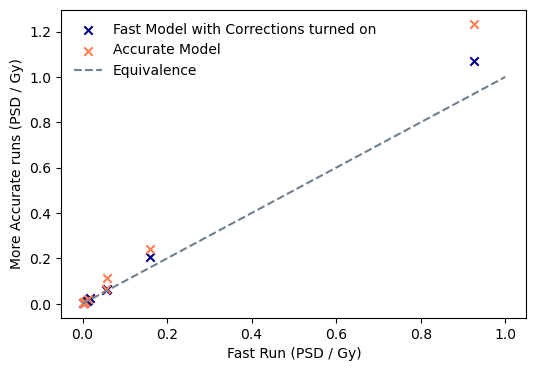

Note how the model is similar in most scenarios, but differs in cases of extreme angles


In [21]:
# Now lets compare the two runs:
plt.figure(figsize = (6,4))
plt.scatter(entiredataframe['PSD'],Run1['PSD'], color = 'Navy', marker='x', label = 'Fast Model with Corrections turned on')
plt.scatter(entiredataframe['PSD'],Run2['PSD'], color = 'Coral', marker='x', label = 'Accurate Model')
plt.plot([0,1],[0,1], '--', color = 'slategrey', label = 'Equivalence')
plt.xlabel('Fast Run (PSD / Gy)')
plt.ylabel('More Accurate runs (PSD / Gy)')
plt.legend(frameon= False)
plt.show()

print('Note how the model is similar in most scenarios, but differs in cases of extreme angles')
